In [9]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import cv2
from PIL import Image

### 讀取圖片資料夾

In [14]:
path = '1027E/'

In [15]:
name_list = list()
area_list = list()

### 畫出遮罩

In [16]:

i = 0

for img_filename in os.listdir(path):
    if '.png' not in img_filename:
        continue
    
    # Read image as grayscale
    img = cv2.imread(path+img_filename, cv2.IMREAD_GRAYSCALE)
    hh, ww = img.shape[:2]

    # threshold
    thresh = cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY)[1]

    # get the (largest) contour
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)

    # draw white filled contour on black background
    mask = np.zeros_like(img)
    cv2.drawContours(mask, [big_contour], 0, (255,255,255), cv2.FILLED)
    
    # save results
    cv2.imwrite('1027E(mask)/'+img_filename, mask)
    
    # reverse mask pixel 0 <-> 255
    mask = np.where(mask>127,0,255)
   
    # convert thresh dtype uint8 -> int32
    thresh = thresh.astype('int32')
    
    # add mask 
    result = cv2.add(thresh,mask)
    result = np.where(result >= 255,0,255)
    
    # save results
    cv2.imwrite('1027E(result)/'+img_filename, result)
    
    
        
         
   

### 計算白色區域函數

In [45]:
def getWhitePixel(img):
    area = 0
    height, width = img.shape
    for i in range(height):
        for j in range(width):
            if img[i, j] == 255:
                area += 1
    area = area/(height*width)
    return area

### 讀取轉換後圖片資料夾

In [81]:
mask_path = '1027E(new)/'
path = '1027E/'

In [82]:
name_list = list() # 記錄檔名
area_list = list() # 紀錄區域

In [83]:
for img_filename in os.listdir(path):
    if '.png' not in img_filename:
        continue
    mask = cv2.imread(mask_path+img_filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(path+img_filename, cv2.IMREAD_GRAYSCALE)
    

In [165]:
mask = cv2.imread(mask_path+'06-88-Frame1.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path+'06-88-Frame1.png', cv2.IMREAD_GRAYSCALE)


In [166]:
mask = np.where(mask>127,0,255)
thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
mask.dtype

dtype('int32')

In [180]:
thresh = thresh.astype('int32')

In [168]:
image = cv2.add(thresh,mask)

In [169]:
image=np.where(image>=255,0,255)

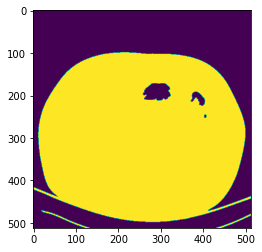

In [181]:
plt.imshow(thresh )
plt.show()

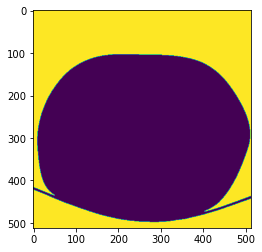

In [171]:
plt.imshow(mask )
plt.show()

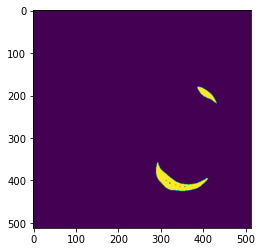

In [172]:
plt.imshow(image)
plt.show()